In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import argparse as ap
from scipy.fftpack import fft
from scipy.fftpack import fftfreq
from scipy.stats import linregress as linregress
from scipy.signal import find_peaks as fpeaks
from scipy.signal import peak_widths as peak_widths
from scipy.fftpack import fftshift
from scipy import interpolate as spInt
import matplotlib.animation as manimation

plt.rc('text', usetex=True)

In [15]:
#data1 = np.genfromtxt("data/reactionRateData3/rate_0/run_0/autoCorr_2550.csv", delimiter=',')
#data2 = np.genfromtxt("data/reactionRateData3/rate_1/run_0/autoCorr_2550.csv", delimiter=',')
#data3 = np.genfromtxt("data/reactionRateData3/rate_2/run_0/autoCorr_2550.csv", delimiter=',')
#data4 = np.genfromtxt("data/reactionRateData3/rate_3/run_0/autoCorr_2550.csv", delimiter=',')
#for i in range(1, 300):
#    data1 = data1 + np.genfromtxt("data/reactionRateData3/rate_0/run_{}/autoCorr_2550.csv".format(i), delimiter=',')
#    data2 = data2 + np.genfromtxt("data/reactionRateData3/rate_1/run_{}/autoCorr_2550.csv".format(i), delimiter=',')
#    data3 = data3 + np.genfromtxt("data/reactionRateData3/rate_2/run_{}/autoCorr_2550.csv".format(i), delimiter=',');;
#    data4 = data4 + np.genfromtxt("data/reactionRateData3/rate_3/run_{}/autoCorr_2550.csv".format(i), delimiter=',')

In [16]:
#data1 = data1/300
#data2 = data2/300
#data3 = data3/300
#data4 = data4/300

In [6]:
#np.savetxt("avg_autoCorr0.csv", data1, delimiter=',')
#np.savetxt("avg_autoCorr1.csv", data2, delimiter=',')
#np.savetxt("avg_autoCorr2.csv", data3, delimiter=',')
#np.savetxt("avg_autoCorr3.csv", data4, delimiter=',')

In [27]:
data1 = np.genfromtxt("data/multiData1/rate_0/avg_auto_corr.csv", delimiter=',')
data2 = np.genfromtxt("data/multiData1/rate_1/avg_auto_corr.csv", delimiter=',')
data3 = np.genfromtxt("data/multiData1/rate_2/avg_auto_corr.csv", delimiter=',')
data4 = np.genfromtxt("data/multiData1/rate_3/avg_auto_corr.csv", delimiter=',')
data5 = np.genfromtxt("data/multiData1/rate_4/avg_auto_corr.csv", delimiter=',')
data6 = np.genfromtxt("data/multiData1/rate_5/avg_auto_corr.csv", delimiter=',')
data7 = np.genfromtxt("data/multiData1/rate_6/avg_auto_corr.csv", delimiter=',')
data8 = np.genfromtxt("data/multiData1/rate_7/avg_auto_corr.csv", delimiter=',')

In [35]:
def get_hwhm(data):
    try:
        freq = fftfreq(256)
        specdat  = np.abs(fft(data[0:256]))
        #specdat[0] = specdat[2]
        #specdat = fftshift(specdat)
        specdat = np.abs(fft(data[0:256]) * (2.0 / 2048), 2048)

        adjusted_dat = specdat[0:2048] - (np.max(specdat[0:2048]) / 2)
        argMax = np.argmax(specdat)
        spline = spInt.InterpolatedUnivariateSpline(freq[0:128], adjusted_dat)
        roots = spline.roots()
        HWL = roots[-2]
        HWR = roots[-1]
        for j in range(roots.shape[-1] - 1):
            if roots[j] < freq[argMax] and roots[j + 1] > freq[argMax]:
                HWL = roots[j]
                HWR = roots[j+1]
        FW = HWR - HWL
        return FW
    except IndexError:
        return np.nan

In [36]:
corr_len1 = np.zeros(data1.shape[-1])
corr_len2 = np.zeros(data1.shape[-1])
corr_len3 = np.zeros(data1.shape[-1])
corr_len4 = np.zeros(data1.shape[-1])
corr_len5 = np.zeros(data1.shape[-1])
corr_len6 = np.zeros(data1.shape[-1])
corr_len7 = np.zeros(data1.shape[-1])
corr_len8 = np.zeros(data1.shape[-1])
for i in range(0, data2.shape[-1]):    
    corr_len1[i] = 1/get_hwhm(data1[i])
    corr_len2[i] = 1/get_hwhm(data2[i])
    corr_len3[i] = 1/get_hwhm(data3[i])
    corr_len4[i] = 1/get_hwhm(data4[i])    
    corr_len5[i] = 1/get_hwhm(data5[i])
    corr_len6[i] = 1/get_hwhm(data6[i])
    corr_len7[i] = 1/get_hwhm(data7[i])
    corr_len8[i] = 1/get_hwhm(data8[i])

In [41]:
corr_len1

array([  8.0457126 ,   8.00434657,   8.02692338,   8.57718026,
         8.95228222,   8.74691192,   8.85714189,   8.72739058,
         8.64003962,   8.39485114,   8.61718185,   8.60960675,
         8.57746497,   8.5310997 ,   8.41363579,   9.35964023,
         8.78021849,   8.82997236,   8.91498839,   8.68409225,
         8.49109051,   8.40959688,   8.48860894,   8.70260727,
         8.44677792,   7.99339957,   8.59706044,   9.19589174,
         9.32302803,   9.48110861,   8.55134343,   9.07626346,
         8.59916918,   8.47039613,   8.29086323,   8.6662799 ,
         8.55841359,   9.11397715,   9.36205025,   9.5212148 ,
         9.9333012 ,   9.332863  ,   9.64926512,   9.38973781,
         9.33588201,   8.10529374,   8.81322201,   9.04839726,
         9.40151459,   9.11808631,   8.64915116,   8.68750236,
         8.80556776,   8.92685129,   8.55990083,   8.76753158,
         9.34198642,   9.73808707,   8.98309888,   8.28883055,
         8.69442233,   8.15173955,   7.95727733,   7.25

In [37]:
#r = np.arange(data2.shape[1])

In [38]:
#data1 = np.genfromtxt("data/densityTimeSeries/rate_0/run_0/temporalData.csv", delimiter=',')
#data2 = np.genfromtxt("data/densityTimeSeries/rate_1/run_0/temporalData.csv", delimiter=',')
#data3 = np.genfromtxt("data/densityTimeSeries/rate_2/run_0/temporalData.csv", delimiter=',')
#data4 = np.genfromtxt("data/densityTimeSeries/rate_3/run_0/temporalData.csv", delimiter=',')
#data1 = np.genfromtxt("data/reactionRateData3/rate_0/corr_len_2.csv", delimiter=',')
#data2 = np.genfromtxt("data/reactionRateData3/rate_1/corr_len_2.csv", delimiter=',')
#data3 = np.genfromtxt("data/reactionRateData3/rate_2/corr_len_2.csv", delimiter=',')
#data4 = np.genfromtxt("data/reactionRateData3/rate_3/corr_len_2.csv", delimiter=',')
#for i in range(1, 50):
#    data1 = data1 + np.genfromtxt("data/densityTimeSeries/rate_0/run_{}/temporalData.csv".format(i), delimiter=',')
#    data2 = data2 + np.genfromtxt("data/densityTimeSeries/rate_1/run_{}/temporalData.csv".format(i), delimiter=',')
#    data3 = data3 + np.genfromtxt("data/densityTimeSeries/rate_2/run_{}/temporalData.csv".format(i), delimiter=',')
#    data4 = data4 + np.genfromtxt("data/densityTimeSeries/rate_3/run_{}/temporalData.csv".format(i), delimiter=',')

In [39]:
#data1 = data1/50
#data2 = data2/50
#data3 = data3/50
#data4 = data4/50
r = np.arange(corr_len1.shape[-1])

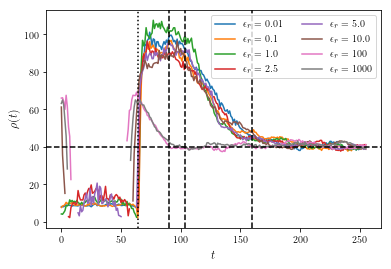

In [56]:
fig1, ax1 = plt.subplots(facecolor="white")
ax1.plot(r[:], corr_len1[:], linestyle='-', label=r"$\epsilon_r = 0.01$")
ax1.plot(r[:], corr_len2[:], linestyle='-', label=r"$\epsilon_r = 0.1$")
ax1.plot(r[:], corr_len3[:], linestyle='-', label=r"$\epsilon_r = 1.0$")
ax1.plot(r[:], corr_len4[:], linestyle='-', label=r"$\epsilon_r = 2.5$")
ax1.plot(r[:], corr_len5[:], linestyle='-', label=r"$\epsilon_r = 5.0$")
ax1.plot(r[:], corr_len6[:], linestyle='-', label=r"$\epsilon_r = 10.0$")
ax1.plot(r[:], corr_len7[:], linestyle='-', label=r"$\epsilon_r = 100$")
ax1.plot(r[:], corr_len8[:], linestyle='-', label=r"$\epsilon_r = 1000$")
#ax1.plot(data1, linestyle="-", label=r"$\epsilon_m = 0.1$")
#ax1.plot(data2, linestyle="-", label=r"$\epsilon_m = 2.5$")
#ax1.plot(data3, linestyle="-", label=r"$\epsilon_m = 5.0$")
#ax1.plot(data4, linestyle="-", label=r"$\epsilon_m = 10.0$")
#ax1.semilogy(r[1:128], data1[70,1:128], label=r"$\epsilon_r = 0.1$")
#ax1.semilogy(r[1:128], data2[70,1:128], label=r"$\epsilon_r = 2.5$")
#ax1.semilogy(r[1:128], data3[70,1:128], label=r"$\epsilon_r = 5.0$")
#ax1.semilogy(r[1:128], data4[70,1:128], label=r"$\epsilon_r = 10.0$")
#ax1.axhline(30, linestyle='--', color='k')
ax1.axvline(64, linestyle=':', color='k')
ax1.axvline(90, linestyle='--', color='k')
ax1.axvline(104, linestyle='--', color='k')
ax1.axvline(160, linestyle='--', color='k')
#ax1.axvline(511, linestyle='-', color='k')
ax1.axhline(40, linestyle='--', color='k')#, label='Mean Field Carrying Capacity')
ax1.set_xlabel(r'$t$', fontsize='large')
ax1.set_ylabel(r'$\rho(t)$', fontsize='large')
#ax1.set_ylim(bottom=0, top=50)
ax1.legend(fontsize='medium', ncol=2)

#plt.savefig("net_densities.png", dpi=200)

In [21]:
data5  = np.genfromtxt("data/reactionRateData6/rate_0/corr_len.csv", delimiter=',')
data6  = np.genfromtxt("data/reactionRateData6/rate_1/corr_len.csv", delimiter=',')
data7  = np.genfromtxt("data/reactionRateData6/rate_2/corr_len.csv", delimiter=',')
data8  = np.genfromtxt("data/reactionRateData6/rate_3/corr_len.csv", delimiter=',')
data9  = np.genfromtxt("data/reactionRateData6/rate_4/corr_len.csv", delimiter=',')
data10 = np.genfromtxt("data/reactionRateData6/rate_5/corr_len.csv", delimiter=',')
data11 = np.genfromtxt("data/reactionRateData6/rate_6/corr_len.csv", delimiter=',')
#data12 = np.genfromtxt("data/reactionRateData6/rate_7/corr_len.csv", delimiter=',')

In [22]:
R = np.arange(data5.shape[-1])

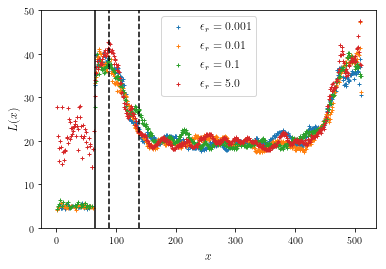

In [33]:
fig1, ax1 = plt.subplots(facecolor="white")
ax1.plot(R[:], data5[:], marker='+', markersize=4, linestyle='None', label=r"$\epsilon_r = 0.001$")
ax1.plot(R[:], data6[:], marker='+', markersize=4, linestyle='None', label=r"$\epsilon_r = 0.01$")
ax1.plot(R[:], data7[:], marker='+', markersize=4, linestyle='None', label=r"$\epsilon_r = 0.1$")
ax1.plot(R[:], data8[:], marker='+', markersize=4, linestyle='None', label=r"$\epsilon_r = 5.0$")
#ax1.plot(data1, linestyle="-", label=r"$\epsilon_m = 0.1$")
#ax1.plot(data2, linestyle="-", label=r"$\epsilon_m = 2.5$")
#ax1.plot(data3, linestyle="-", label=r"$\epsilon_m = 5.0$")
#ax1.plot(data4, linestyle="-", label=r"$\epsilon_m = 10.0$")
#ax1.semilogy(r[1:128], data1[70,1:128], label=r"$\epsilon_r = 0.1$")
#ax1.semilogy(r[1:128], data2[70,1:128], label=r"$\epsilon_r = 2.5$")
#ax1.semilogy(r[1:128], data3[70,1:128], label=r"$\epsilon_r = 5.0$")
#ax1.semilogy(r[1:128], data4[70,1:128], label=r"$\epsilon_r = 10.0$")
#ax1.axhline(30, linestyle='--', color='k')
ax1.axvline(64, linestyle='-', color='k')
ax1.axvline(89, linestyle='--', color='k')
ax1.axvline(139, linestyle='--', color='k')
#ax1.axvline(438, linestyle='--', color='k')
#ax1.axvline(511, linestyle='-', color='k')
#ax1.axhline(0.75, linestyle='--', color='k', label='Mean Field Carrying Capacity')
ax1.set_xlabel(r'$x$', fontsize='large')
ax1.set_ylabel(r'$L(x)$', fontsize='large')
ax1.set_ylim(bottom=0, top=50)
ax1.legend(fontsize='large') #, ncol=2)
plt.savefig('corr_len_test6_1.png', dpi=200)

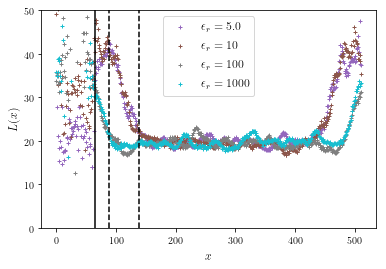

In [35]:
fig2, ax2 = plt.subplots(facecolor="white")
ax2.plot(R[:], data8[:], marker='+', markersize=4, linestyle='None', color='tab:purple', label=r"$\epsilon_r = 5.0$")
ax2.plot(R[:], data9[:], marker='+', markersize=4, linestyle='None', color='tab:brown', label=r"$\epsilon_r = 10$")
ax2.plot(R[:], data10[:], marker='+', markersize=4, linestyle='None', color='tab:gray', label=r"$\epsilon_r = 100$")
ax2.plot(R[:], data11[:], marker='+', markersize=4, linestyle='None', color='tab:cyan', label=r"$\epsilon_r = 1000$")
#ax1.plot(data1, linestyle="-", label=r"$\epsilon_m = 0.1$")
#ax1.plot(data2, linestyle="-", label=r"$\epsilon_m = 2.5$")
#ax1.plot(data3, linestyle="-", label=r"$\epsilon_m = 5.0$")
#ax1.plot(data4, linestyle="-", label=r"$\epsilon_m = 10.0$")
#ax1.semilogy(r[1:128], data1[70,1:128], label=r"$\epsilon_r = 0.1$")
#ax1.semilogy(r[1:128], data2[70,1:128], label=r"$\epsilon_r = 2.5$")
#ax1.semilogy(r[1:128], data3[70,1:128], label=r"$\epsilon_r = 5.0$")
#ax1.semilogy(r[1:128], data4[70,1:128], label=r"$\epsilon_r = 10.0$")
#ax1.axhline(30, linestyle='--', color='k')
ax2.axvline(64, linestyle='-', color='k')
ax2.axvline(89, linestyle='--', color='k')
ax2.axvline(138, linestyle='--', color='k')
#ax1.axvline(438, linestyle='--', color='k')
#ax1.axvline(511, linestyle='-', color='k')
#ax1.axhline(0.75, linestyle='--', color='k', label='Mean Field Carrying Capacity')
ax2.set_xlabel(r'$x$', fontsize='large')
ax2.set_ylabel(r'$L(x)$', fontsize='large')
ax2.set_ylim(bottom=0, top=50)
ax2.legend(fontsize='large') #, ncol=2)
plt.savefig('corr_len_test6_2.png', dpi=200)